<a href="https://colab.research.google.com/github/Irapuspitasari/0071-IPS/blob/master/FuzzyCmeans_G_211_20_0071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=6ed8feedca2111d5337ca15842dd1246317ae7dd1220ef38f6da4e585c6d7fa4
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [3]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [4]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [6]:
base.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [7]:
X = base.iloc[:,[1,25]].values

In [22]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [8]:
X.shape

(30000, 2)

In [9]:
r = skfuzzy.cmeans(data = X.T, c = 3, m=2, error=0.005, maxiter=1000, init=None)

In [10]:
r

(array([[ 175795.55063659,  491924.93006939],
        [ 308714.5374468 , 1332268.0041896 ],
        [ 140102.37773825,   80565.25239417]]),
 array([[0.07016207, 0.01898463, 0.01813626, ..., 0.05751395, 0.38188152,
         0.26316779],
        [0.00987791, 0.00245832, 0.00185366, ..., 0.00684962, 0.01926972,
         0.01726463],
        [0.91996001, 0.97855705, 0.98001008, ..., 0.93563644, 0.59884876,
         0.71956759]]),
 array([[0.57657502, 0.04777197, 0.0800106 , ..., 0.36971357, 0.57234571,
         0.40343393],
        [0.06438546, 0.44339935, 0.7255949 , ..., 0.28087024, 0.18505301,
         0.55448347],
        [0.35903952, 0.50882868, 0.1943945 , ..., 0.34941619, 0.24260128,
         0.0420826 ]]),
 array([[ 508667.0450456 ,  478114.73535337,  399591.11089853, ...,
          445935.74165439,  244832.9116052 ,  289779.41377892],
        [1355664.37045749, 1328661.18861996, 1249899.7309493 , ...,
         1292188.21536989, 1089924.39656054, 1131371.71802689],
        [ 140475

In [12]:
previsoes_porcentagem = r[1]
previsoes_porcentagem.shape

(3, 30000)

In [13]:
previsoes_porcentagem

array([[0.07016207, 0.01898463, 0.01813626, ..., 0.05751395, 0.38188152,
        0.26316779],
       [0.00987791, 0.00245832, 0.00185366, ..., 0.00684962, 0.01926972,
        0.01726463],
       [0.91996001, 0.97855705, 0.98001008, ..., 0.93563644, 0.59884876,
        0.71956759]])

In [14]:
previsoes_porcentagem[0][0]

0.07016207367163776

In [15]:
previsoes_porcentagem[1][0]

0.009877914348321967

In [17]:
previsoes_porcentagem[2][0]

0.9199600119800402

In [16]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

0.9999999999999999

In [19]:
previsoes = previsoes_porcentagem.argmax(axis=0)
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [20]:
previsoes[5000]

2

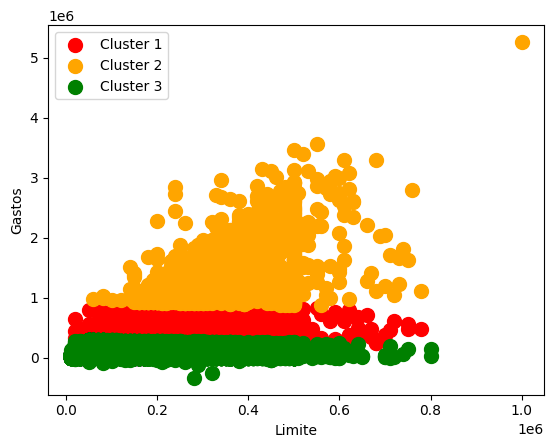

In [21]:
plt.scatter(X[previsoes ==0, 0], X[previsoes ==0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[previsoes ==1, 0], X[previsoes ==1, 1], s = 100, c= 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes ==2, 0], X[previsoes ==2, 1], s = 100, c= 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();